# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary (rebounds, point scored, etc)
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [1]:
# Import the necessary libraries to start
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Also import the data sets.
salary=pd.read_csv("2025_salaries.csv", header=1, encoding="latin-1")
stats=pd.read_csv("nba_2025.csv", encoding="latin-1")

In [2]:
# Drop variables that will not be needed or are duplicates
merged=pd.merge(salary, stats, on="Player")
merged=merged.drop(columns=["Player-additional","Awards"])
merged=merged.drop_duplicates()

players = merged.sort_values("Team")
players=players.drop_duplicates(subset="Player", keep="first")

final=players.drop(columns=["Tm","Team","Pos","Rk"]).dropna()
final["2025-26"]=final["2025-26"].str.replace("$","").str.replace(",","").astype(int)
fitting=final.drop(columns=["Player","Age"])

# Make a standard scale for the data, since not all of the data is on a standard scale (ex. field goal percentage is not on the same scale as points).
scaler=StandardScaler()
X=scaler.fit_transform(fitting)

In [3]:
# Run the clustering algo with your best guess for K
kmeans=KMeans(n_clusters=2, random_state=42).fit(X)

In [4]:
# View the results

print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-0.34198568 -0.4182708  -0.58320499 -0.61907822 -0.63639971 -0.62740174
  -0.15715076 -0.46546173 -0.48105862 -0.06940124 -0.59821005 -0.59934775
  -0.0809118  -0.12509982 -0.55642335 -0.5689695  -0.11278658 -0.35178306
  -0.56723671 -0.53497043 -0.52093405 -0.50530156 -0.3512768  -0.59626002
  -0.53168474 -0.63304739 -0.17753125]
 [ 0.56685298  0.69329817  0.96668225  1.02614335  1.05485431  1.03993987
   0.26048277  0.77151877  0.79737113  0.11503493  0.99155364  0.99343942
   0.13411408  0.20735724  0.92229076  0.94308643  0.18694761  0.58309247
   0.94021427  0.88673181  0.86346602  0.83755465  0.58225332  0.9883214
   0.88128567  1.04929774  0.29426413]]
[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1

In [ ]:
# Create a visualization of the results with 2 or 3 variables that you think will best
# differentiate the clusters

fig = px.scatter_3d( 
    final, x="PTS", y="2025-26", z="eFG%",
    color=kmeans.labels_,
    title="Test data: Points scored, Salary, and Effective Field Goal %")
# fig.show(renderer="browser")

In [6]:
# Evaluate the quality of the clustering using total variance explained and silhouette scores

# Variance explained is a percentage, where closer to 1 is better. 
total_sum_squares = np.sum((X - np.mean(X))**2)
total = np.sum(total_sum_squares)
between_SSE = (total - kmeans.inertia_)
var_explained = between_SSE / total
print(f"Variance Explained: {var_explained:.4f} or {var_explained*100:.2f}%")

# Silhouette score is another way of evaluating a model. 
kmeans_obj = KMeans(n_clusters=2, algorithm="lloyd", random_state=1)
kmeans_obj.fit(X)
print(silhouette_score(X, kmeans_obj.labels_))

Variance Explained: 0.3763 or 37.63%
0.3345730276066693


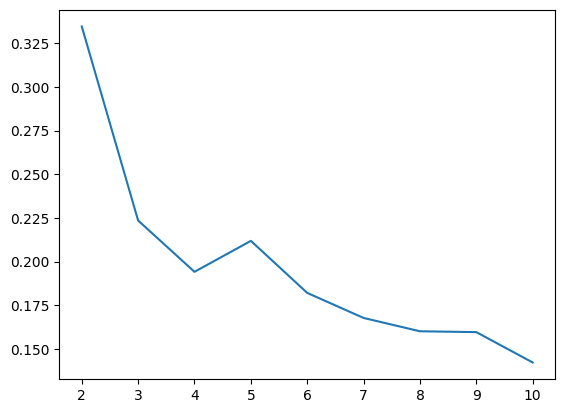

In [7]:
# Determine the ideal number of clusters using the elbow method and the silhouette coefficient

wcss = []
silhouette=[]
for i in range(1, 11):
    kmeans_obj = KMeans(n_clusters=i, algorithm="lloyd", random_state=1).fit(X)
    wcss.append(kmeans_obj.inertia_)
    if i>1:
        silhouette.append(silhouette_score(X, kmeans_obj.labels_))
elbow_data = pd.DataFrame({"k": range(1, 11), "wcss": wcss})
elbow_data

plt.plot([2,3,4,5,6,7,8,9,10],silhouette)

In [8]:
# Visualize the results of the elbow method

fig = px.line(elbow_data, x="k", y="wcss", title="Elbow Method")
fig.show()

In [ ]:
# Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results
# From both models, it seems that k=3 is the best number of clusters.

better_kmeans=KMeans(n_clusters=3, random_state=42).fit(X)

fig = px.scatter_3d(
    final, x="PTS", y="2025-26", z="eFG%",
    color=better_kmeans.labels_,
    title="Test data (k=3): Points scored, Salary, and Effective Field Goal %")
fig.show(renderer="browser")

In [10]:
# Once again evaluate the quality of the clustering using total variance explained and silhouette scores

better_total_sum_squares = np.sum((X - np.mean(X))**2)
better_total = np.sum(better_total_sum_squares)
better_between_SSE = (better_total - better_kmeans.inertia_)
better_var_explained = better_between_SSE / better_total
print(f"Variance Explained: {better_var_explained:.4f} or {better_var_explained*100:.2f}%")

better_kmeans_obj = KMeans(n_clusters=3, algorithm="lloyd", random_state=1)
better_kmeans_obj.fit(X)
print(silhouette_score(X, better_kmeans_obj.labels_))

Variance Explained: 0.4789 or 47.89%
0.2235322604321499


In [14]:
# Use the model to select players for Mr. Rooney to consider
final["Cluster"]=better_kmeans.fit_predict(X)
cluster_0_players=final[final["Cluster"]==0][["Player","PTS","2025-26","eFG%","Age"]]
cluster_1_players=final[final["Cluster"]==1][["Player","PTS","2025-26","eFG%","Age"]]
cluster_2_players=final[final["Cluster"]==2][["Player","PTS","2025-26","eFG%","Age"]]
cluster_2_players

,Player,PTS,2025-26,eFG%,Age
277,Ayo Dosunmu,721.0,7518518,0.606,26.0
281,Isaiah Jackson,248.0,7600000,0.587,24.0
306,Bennedict Mathurin,522.0,9187573,0.503,23.0
312,Buddy Hield,354.0,9219512,0.543,33.0
72,Marvin Bagley III,417.0,2296274,0.633,26.0
...,...,...,...,...,...
131,Isaiah Collier,499.0,2638200,0.540,21.0
291,Tre Johnson,515.0,8237640,0.540,19.0
196,Bub Carrington,538.0,4677600,0.520,20.0
276,Bilal Coulibaly,322.0,7275600,0.448,21.0


In [20]:
# Write up the results in a separate notebook with supporting visualizations and 
# an overview of how and why you made the choices you did. This should be at least 
# 500 words and should be written for a non-technical audience.

print("Players to select: \n Ryan Kalkbrenner, Jaxson Hayes. Good prospects, with low salaries and high eFG%, relatively young. \n Jaylon Tyson and Keyonte George, prospects with a higher than average amount of points for a younger player.")
print("Players not to select: \n OG Anunoby, most likely into his 2nd half of his career with a high salary but not enough points to make up for it. \n  Evan Mobley, although younger, makes a decent amount of points but not for his salary. \n  Joe Ingles, near the end of his career (38 years old) has very few points and an average eFG%, past his prime.")
print("Possible players to select: \n Mikal Bridges, above average pts, average eFG%, but high salary and 29 years old \n Tim Hardaway Jr, above average points and eFG% with lower salary, but an older player (use for a few years but not for longevity). \n Immanuel Quickley, above average points and average eFG%, but high salary.")

Players to select: 
 Ryan Kalkbrenner, Jaxson Hayes. Good prospects, with low salaries and high eFG%, relatively young. 
 Jaylon Tyson and Keyonte George, prospects with a higher than average amount of points for a younger player.
Players not to select: 
 OG Anunoby, most likely into his 2nd half of his career with a high salary but not enough points to make up for it. 
  Evan Mobley, although younger, makes a decent amount of points but not for his salary. 
  Joe Ingles, near the end of his career (38 years old) has very few points and an average eFG%, past his prime.
Possible players to select: 
 Mikal Bridges, above average pts, average eFG%, but high salary and 29 years old 
 Tim Hardaway Jr, above average points and eFG% with lower salary, but an older player (use for a few years but not for longevity). 
 Immanuel Quickley, above average points and average eFG%, but high salary.
